<a href="https://colab.research.google.com/github/pidipidi/cs470_IAI/blob/main/tutorial_2/tutorial2_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Please run this tutorial on Google Chrome.

[https://www.google.com/chrome](https://www.google.com/chrome)


The tutorial may not work properly if you use a browser other than Google Chrome

In [1]:
#@title Run the following commands to install dependencies
#Install dependencies for OpenAI Gym and Stable-baselines3
!apt install swig cmake &> /dev/null
!pip install stable-baselines3[extra] box2d box2d-kengz &> /dev/null
!pip install gym==0.24.0 gym[classic_control] &> /dev/null

#Install dependencies to visualize agents
!apt-get install -y xvfb python-opengl x11-utils &> /dev/null
!pip install pyvirtualdisplay scikit-video ffio pyrender &> /dev/null
import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#@title Run the following commands to define visualization tools
import numpy as np
import gym

import skvideo.io
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()
def save_video_of_model(env_name, policy=None, suffix=""):
    """Record an agent behavior in an input environment"""

    env = gym.make(env_name)
    obs = env.reset()
    prev_obs = obs

    filename = env_name + suffix + ".mp4"
    output_video = skvideo.io.FFmpegWriter(filename)

    counter = 0
    done = False
    if hasattr(env, "render_mode"):
        env.render_mode="rgb_array"
    while not done:
        frame = env.render(mode='rgb_array')
        output_video.writeFrame(frame)

        input_obs = obs

        if policy is not None:
            # action, _ = policy(input_obs)
            action = policy(input_obs)
        else:
            action = env.action_space.sample()

        if "FrozenLake" in env_name:
            action = action.item()
        prev_obs = obs
        
        obs, reward, done, info = env.step(action)
        counter += 1

    output_video.close()
    print("Successfully saved {} frames into {}!".format(counter, filename))
    return filename

def play_video(filename, width=None):
    """Play the filename of video"""
    from IPython.display import HTML
    from base64 import b64encode
    
    mp4 = open(filename,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    source = """
    <video width=400 controls>
          <source src="%s" type="video/mp4">
    </video>
    """ % data_url
    return source


from gym import register
if 'FrozenLake-v0' in gym.envs.registration.registry.env_specs:
  del gym.envs.registration.registry.env_specs['FrozenLake-v0']
register(
    id="FrozenLake-v0",
    entry_point="gym.envs.toy_text.frozen_lake:FrozenLakeEnv",
    kwargs={"map_name": "4x4", "is_slippery": False},
    max_episode_steps=100,
    reward_threshold=1.0,
)

import torch
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # numpy
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    # pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed) 
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = False 

my_seed = 42
my_seed_everywhere(my_seed)

### Make sure you are using 0.24.0 version of gym.

In [9]:
!pip show gym

Name: gym
Version: 0.24.0
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: gym-notices, numpy, cloudpickle, importlib-metadata
Required-by: stable-baselines3, dopamine-rl


# CartPole-v0 environment

In this quiz, we will use CartPole-v0 environment. This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

https://www.gymlibrary.dev/environments/classic_control/cart_pole/

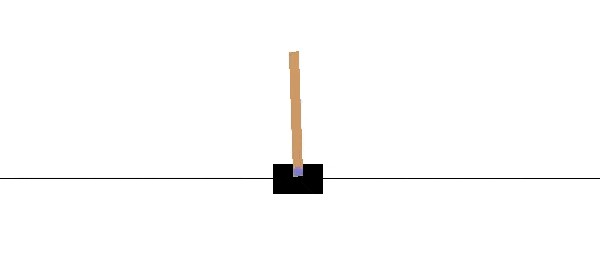

# 1. Please choose the pair that properly describes the class of (observation_space, action_space) of "CartPole-v0".



1.   (Discrete, Discrete)
2.   (Box, Discrete)
3.   (Discrete, Box)
4.   (Box, Box)


You may use the cell below to find the answer

In [ ]:
import gym

env = gym.make("CartPole-v0")

print( ... )

# 2. Please choose the pair that properly fills in the sentence.

We use {$\qquad$} method to initialize or restart the environment. If we initialize "CartPole-v0" environment, each element of the initial state fall within {$\qquad$} range.


1.   (step, [-0.05, 0.05])
2.   (reset, [0.05, 0.05])
3.   (reset, [-0.01, 0.01])
4.   (render, [-0.01, 0.01])


You may use the cell below to find the answer

In [13]:
import gym

env = gym.make("CartPole-v0")

...

# 3. Please choose the answer that correctly estimates the maximum total reward of "CartPole-v0" environment.


1.   ~100
2.   ~200
3.   ~500
4.   ~700


You may use the cell below to find the answer.

You may increase (decrease) the total_timestep value if you think the agent has not trained enough (has trained enough).

In [ ]:
import stable_baselines3
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.evaluation import evaluate_policy

######################################################################
##  You can choose your Algorithm / Environment / seed as you want  ##
######################################################################

policy_cls = ...
env_id = "CartPole-v0"
SEED = 47

######################################################################
######################################################################


# Use a separate environement for evaluation
env = gym.make(env_id)
eval_env = gym.make(env_id)
# Initialize Agent, which is currently an random Agent, before training
model = policy_cls(policy='MlpPolicy',      # For vision-based RL, we use 'CnnPolicy'
            env=env, 
            seed=SEED, 
            gamma=0.9)

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback, EveryNTimesteps, EvalCallback

rewards = []
class CB(EvalCallback):
    def _on_step(self) -> bool:
        if self.n_calls % self.eval_freq == 0:
            mean_reward, std_reward = evaluate_policy(self.model, self.eval_env, n_eval_episodes=5)
            rewards.append(mean_reward)
            print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
        return True

cb = CB(eval_env=eval_env, eval_freq=10000)
model.learn(total_timesteps=100000, callback=cb)


In [ ]:
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [ ]:
save_video_of_model(env_id, policy=lambda *x: model.predict(*x)[0])

from IPython.display import HTML
source = play_video(filename=f'{env_id}.mp4')
HTML(source)